In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import cv2
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix
# from google.colab.patches import cv2_imshow

In [2]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [3]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
print(X_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

In [5]:
print(Y_train[0])

5


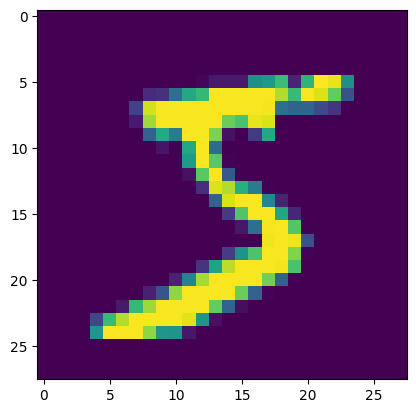

5


In [6]:
# Displaying the image 

plt.imshow(X_train[0])
plt.show()

print(Y_train[0])

In [7]:
print(np.unique(Y_train))

print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


In [8]:
# Scaling the values
X_train = X_train/255
X_test = X_test/255

In [9]:
print(X_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

Building a neural nw 

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(10, activation = 'sigmoid')
])

In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [12]:
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 3ms/step - loss: 0.3061 - accuracy: 0.9115
Epoch 2/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1407 - accuracy: 0.9581
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1043 - accuracy: 0.9676
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0844 - accuracy: 0.9743
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0708 - accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0613 - accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0534 - accuracy: 0.9829
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0474 - accuracy: 0.9851
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0411 - accuracy: 0.9860
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.035

In [13]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.1015 - accuracy: 0.9715
0.9714999794960022


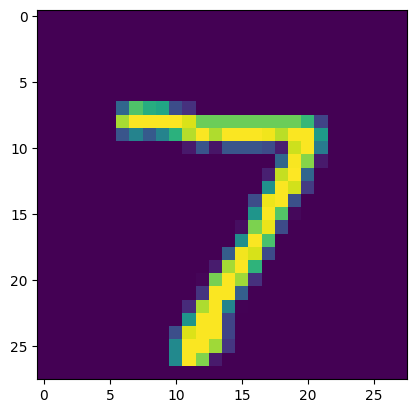

In [14]:
plt.imshow(X_test[0])
plt.show()

In [15]:
print(Y_test[0])

7


In [16]:
# model.predict gives the prediction probaility of each class for that data point 

In [17]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 3ms/step


In [18]:
Y_pred.shape

(10000, 10)

In [19]:
print(Y_pred[0])

[7.7891443e-03 2.5970158e-01 8.9330071e-01 9.9858618e-01 1.1054008e-08
 3.1669855e-01 1.3222770e-09 9.9999928e-01 9.0762717e-01 4.1072443e-01]


In [20]:
# Probability of the image being of 
# 0 is 5.6167168e-04
# 1 is 1.4733444e-03 and so on 

In [21]:
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [22]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 9, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 5, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 0, 8, 5, 7, 7, 4, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 4, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [23]:
print(len(Y_pred_labels))

10000


In [24]:
print(Y_pred)

[[7.7891443e-03 2.5970158e-01 8.9330071e-01 ... 9.9999928e-01
  9.0762717e-01 4.1072443e-01]
 [2.3770377e-02 9.9954242e-01 1.0000000e+00 ... 6.6801957e-03
  8.9810491e-01 1.2697703e-08]
 [1.6499422e-02 9.9962831e-01 7.0225924e-01 ... 3.8523427e-01
  8.7550128e-01 1.7597018e-02]
 ...
 [2.2227332e-05 7.7599456e-04 2.1572640e-07 ... 2.0938307e-01
  1.8923027e-02 9.9688083e-01]
 [4.6950392e-03 1.8018523e-05 1.3212698e-07 ... 5.9774158e-07
  9.8824948e-01 6.8062129e-03]
 [4.6947030e-03 2.5148623e-02 3.9475650e-02 ... 1.2816707e-09
  3.0220667e-01 2.6367825e-05]]


Confusion Matrix 

In [25]:
 conf_matrix =confusion_matrix(Y_test, Y_pred_labels)
print(conf_matrix)

tf.Tensor(
[[ 968    0    1    1    1    2    4    1    2    0]
 [   0 1122    2    3    0    0    1    0    6    1]
 [   7    4  988    5    7    2    3    7    9    0]
 [   1    1    1  980    0   15    0    6    3    3]
 [   1    0    3    1  967    2    2    1    1    4]
 [   2    0    0   10    5  865    5    1    2    2]
 [   4    3    1    2   10    5  928    0    5    0]
 [   0    8    8    1    1    0    0 1001    3    6]
 [   2    1    0    7    7    7    1    3  940    6]
 [   2    2    0    3   32    8    0    5    4  953]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'Predicted labels')

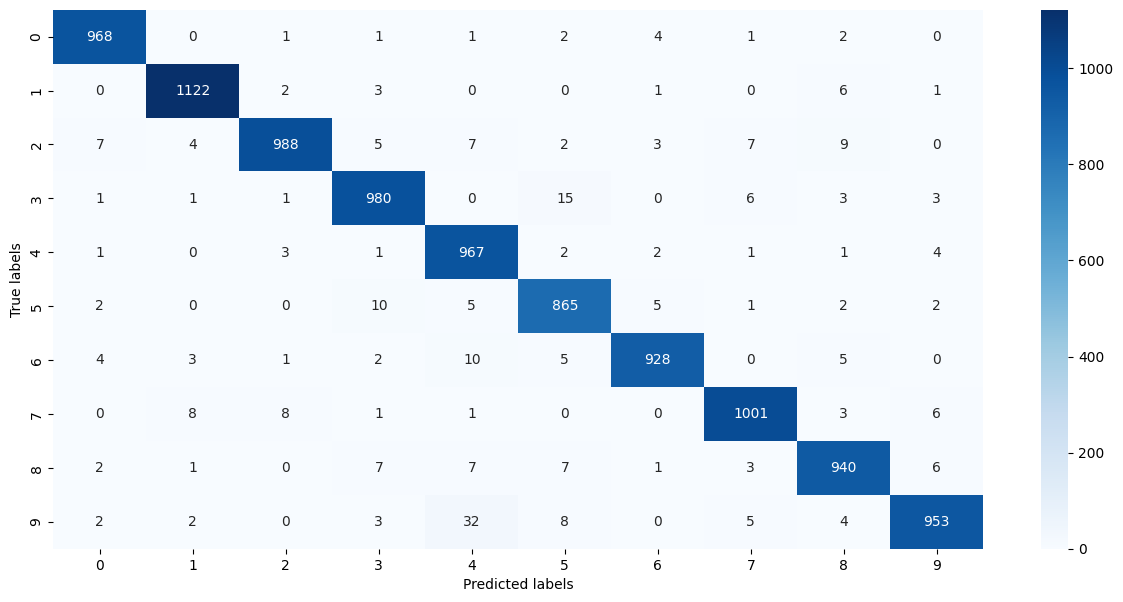

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = 'Blues')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

Build a predictive system

In [27]:
img_path = '3.jpg'
input_img = cv2.imread(img_path)

In [28]:
type(input_img)

numpy.ndarray

In [29]:
print(input_img)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


In [30]:
input_img.shape

(156, 156, 3)

In [31]:
# cv2.imshow("Image", input_img)
# cv2.waitKey(0)  # Wait for a key press to close the window
# cv2.destroyAllWindows()  # Close the window

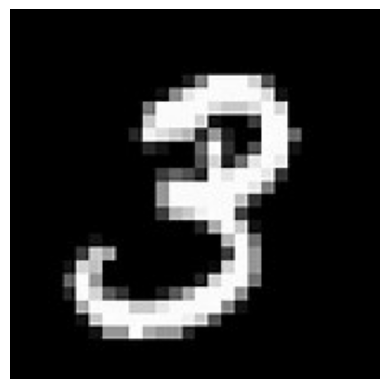

In [32]:
import cv2
import matplotlib.pyplot as plt

# Convert the image from BGR to RGB format
input_img_rgb = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(input_img_rgb)
plt.axis('off')  # Turn off axis labels
plt.show()

In [33]:
grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

In [34]:
grayscale.shape

(156, 156)

In [35]:
input_img_resized = cv2.resize(grayscale, (28, 28))

In [36]:
input_img_resized.shape


(28, 28)

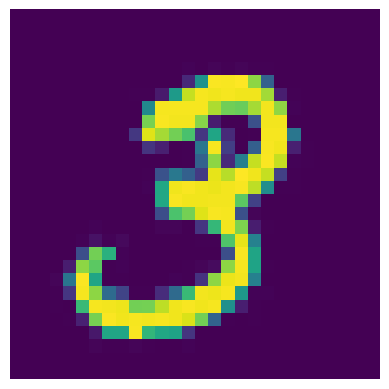

In [37]:
import cv2
import matplotlib.pyplot as plt

# Convert the image from BGR to RGB format
# input_img_rgb = cv2.cvtColor(input_img, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(input_img_resized)
plt.axis('off')  # Turn off axis labels
plt.show()

In [40]:
input_img_resized = input_img_resized / 255

In [45]:
image_reshaped = np.reshape(input_img_resized, [1,28,28])
# In Breast Cancer case we used [1, -1] for handling a single row, Here since it is an image we use the dimenstion of a single image ie. 28 * 28

In [47]:
print(image_reshaped.shape)

(1, 28, 28)


In [48]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 34ms/step
[[1.3876731e-09 3.3411611e-02 4.0582196e-05 1.0000000e+00 2.3408730e-07
  9.9476457e-01 1.4244075e-15 1.0291968e-06 9.9995136e-01 9.9991542e-01]]


In [49]:
input_pred_label = np.argmax(input_prediction)

In [50]:
print(input_pred_label)

3


Predictive Model 

Path of the image to be predicted:  3.jpg


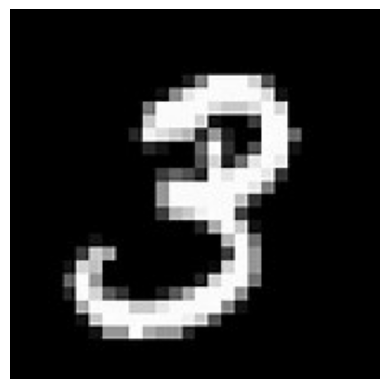

1/1 [==============================] - 0s 35ms/step
The handwritten digit is  3


In [59]:
img_path = input('Path of the image to be predicted: ')
input_img = cv2.imread(img_path)

# Display the image
plt.imshow(input_img)
plt.axis('off')  # Turn off axis labels
plt.show()

# Convert the image from BGR to RGB format
grayscale = cv2.cvtColor(input_img, cv2.COLOR_RGB2GRAY)

input_image_resized = cv2.resize(grayscale, (28,28))

input_image_resized = input_image_resized/255

image_reshaped = np.reshape(input_image_resized, [1,28,28])

input_prediction = model.predict(image_reshaped)

input_pred_label = np.argmax(input_prediction)

print("The handwritten digit is ", input_pred_label)